In [106]:
from IPython.core.display import display, HTML

gif_url1 = "https://indoanalytica.com/static/images/data-science-3.gif"
gif_url2 = "https://media1.tenor.com/m/lvLaG5hPCncAAAAd/data-analysis.gif"

html_code = f"""
<div style="display: flex; justify-content: center; gap: 20px;">
    <img src="{gif_url1}" width="400">
    <img src="{gif_url2}" width="400">
</div>
"""

display(HTML(html_code))


C:\Users\deard\AppData\Local\Temp\ipykernel_19584\1364732415.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


📌 Customer ID - Unique identifier for each customer.
📌 Age - Age of the customer.
📌 Gender - Gender of the customer (Male/Female).
📌 Item Purchased - The item purchased by the customer.
📌 Category - Category of the item purchased.
📌 Purchase Amount (USD) - The amount of the purchase in USD.
📌 Location - Location where the purchase was made.
📌 Size - Size of the purchased item.
📌 Color - Color of the purchased item.
📌 Season - Season during which the purchase was made.
📌 Review Rating - Rating given by the customer for the purchased item.
📌 Subscription Status - Indicates if the customer has a subscription (Yes/No).
📌 Shipping Type - Type of shipping chosen by the customer.
📌 Discount Applied - Indicates if a discount was applied to the purchase (Yes/No).
📌 Promo Code Used - Indicates if a promo code was used for the purchase (Yes/No).
📌 Previous Purchases - Number of previous purchases made by the customer.
📌 Payment Method - Customer's most preferred payment method.
📌 Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly).

In [107]:
!pip install WordCloud

^C


In [80]:
import numpy as np 
import pandas as pd 
# import seaborn as sns
import matplotlib.pyplot as plt 
# import plotly.express as px 

shop = pd.read_csv('shopping_trends_updated.csv')

In [81]:
shop.shape


(3900, 18)

In [82]:
shop.to_excel('shopping_trends_updated.xlsx')

In [83]:
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [84]:
shop.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [85]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [ ]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
shop.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [ ]:
print(f"The unique values of the 'Gender' column are: {shop['Gender'].unique()}")
print()
print(f"The unique values of the 'Category' column are: {shop['Category'].unique()}")
print()
print(f"The unique values of the 'Size' column are: {shop['Size'].unique()}")
print()
print(f"The unique values of the 'Subscription Status' column are: {shop['Subscription Status'].unique()}")
print()
print(f"The unique values of the 'Shipping Type' column are: {shop['Shipping Type'].unique()}")
print()
print(f"The unique values of the 'Discount Applied' column are: {shop['Discount Applied'].unique()}")
print()
print(f"The unique values of the 'Promo Code Used' column are: {shop['Promo Code Used'].unique()}")
print()
print(f"The unique values of the 'Payment Method' column are: {shop['Payment Method'].unique()}")

The unique values of the 'Gender' column are: ['Male' 'Female']

The unique values of the 'Category' column are: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']

The unique values of the 'Size' column are: ['L' 'S' 'M' 'XL']

The unique values of the 'Subscription Status' column are: ['Yes' 'No']

The unique values of the 'Shipping Type' column are: ['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']

The unique values of the 'Discount Applied' column are: ['Yes' 'No']

The unique values of the 'Promo Code Used' column are: ['Yes' 'No']

The unique values of the 'Payment Method' column are: ['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']


## OBSERVATION:
Upon initial examination of the dataset, it is evident that we have a comprehensive and well-structured dataset with 3900 rows and 18 columns. The data is complete, with no missing values, which allows us to proceed confidently with our analysis.

Let's delve into the columns and their significance in understanding our custome      

-  **Customer ID:** This column serves as a unique identifier for each customer, enabling us to differentiate between individuals.
-  **Age:** The age column provides insights into the age demographics of our customers, helping us understand their preferences and behaviors.
-  **Gender:** This column showcases the gender of the customers, enabling us to analyze buying patterns based on gender.
-  **Item Purchased:** Here, we can identify the specific products that customers have bought, allowing us to gain an understanding of popular choices.
-  **Category:** The category column categorizes the products into different groups such as clothing, footwear, and more, aiding us in analyzing trends within specific product categories.
-  **Purchase Amount (USD):** This column reveals the amount customers spent on their purchases, providing insights into their spending habits.
-  **Location:** The location column indicates the geographical location of customers, which can help identify regional trends and preferences.
-  **Size:** This column denotes the size of the purchased products, assisting in understanding size preferences across different categories.
-  **Color:** Here, we can determine the color preferences of customers, aiding in analyzing color trends and their impact on purchasing decisions.
-  **Season:** The season column allows us to identify the season during which customers made their purchases, enabling us to explore seasonal shopping trends.
-  **Review Rating:** This column showcases the ratings given by customers, providing valuable feedback on product satisfaction and quality.
-  **Subscription Status:** This column indicates whether customers have opted for a subscription status, which can help us understand customer loyalty and engagement.
-  **Shipping Type:** Here, we can identify the different shipping methods used to deliver products to customers, shedding light on preferred shipping options.
-  **Discount Applied:** This column indicates whether a discount was applied to the purchased products, enabling us to analyze the impact of discounts on customer behavior.
-  **Promo Code Used:** Here, we can identify whether customers utilized promo codes during their purchases, helping us evaluate the effectiveness of promotional campaigns.
-  **Previous Purchases:** This column reveals the number of previous purchases made by customers, aiding in understanding customer loyalty and repeat business.
-  **Payment Method:** The payment method column showcases the various methods used by customers to make their purchases, allowing us to analyze preferred payment options.
-  **Frequency of Purchases:** This column provides insights into the frequency at which customers make purchases, helping us identify patterns and customer buying habits.

ustomer buying habits.
With this rich and diverse dataset, we are well-equipped to explore customer shopping trends, understand their preferences, and uncover valuable insights that can drive informed decision-making and enhance the overall customer experience. Let's embark on this exciting analysis journey!


## 1 What is the overall distribution of customer ages in the dataset?

In [89]:
shop['Age'].value_counts()

Age
69    88
57    87
41    86
25    85
49    84
54    83
27    83
50    83
62    83
32    82
58    81
19    81
42    80
31    79
28    79
43    79
37    77
29    76
46    76
63    75
59    75
68    75
56    74
36    74
52    73
64    73
55    73
51    72
65    72
45    72
40    72
35    72
47    71
66    71
30    71
23    71
53    70
38    70
18    69
26    69
21    69
34    68
39    68
48    68
24    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64

In [90]:
shop['Age'].mean()

np.float64(44.06846153846154)

In [91]:
shop['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [92]:
shop['Age_category'] = pd.cut(shop['Age'], bins= [0,15, 18 , 30 , 50 , 70] , labels= ['child' , 'teen' , 'Young Adults' ,'Middle-Aged Adults'
                                                                                             , 'old'] )

C:\Users\deard\AppData\Local\Temp\ipykernel_19584\1936813378.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_categories = shop.groupby('Age_category')['Age'].count()


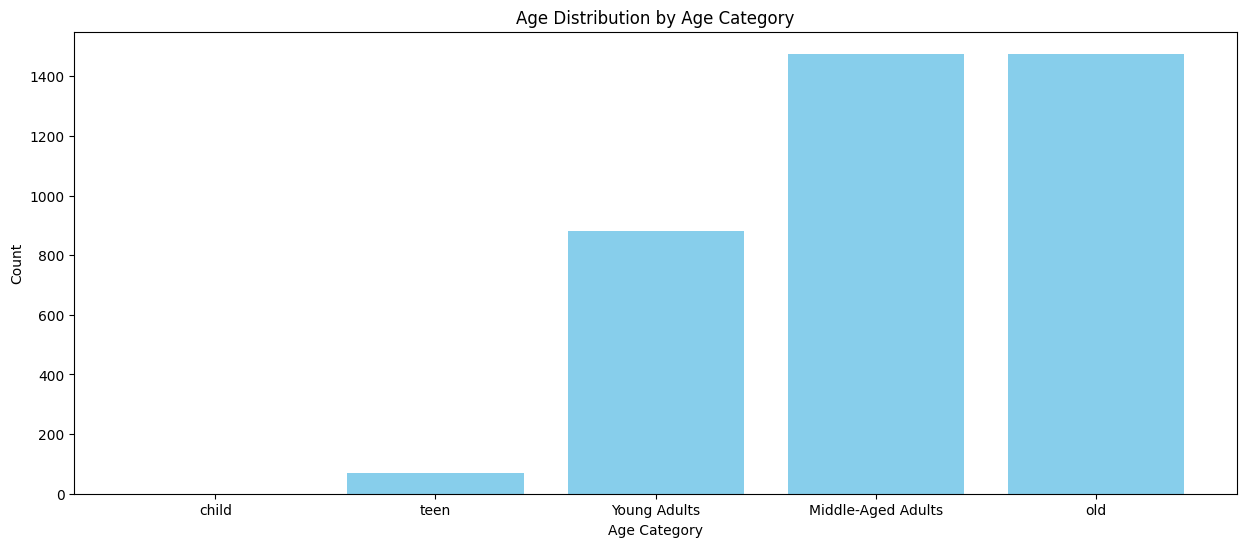

In [93]:
import matplotlib.pyplot as plt 

age_categories = shop.groupby('Age_category')['Age'].count()

plt.figure(figsize=(15,6))
plt.bar(age_categories.index, age_categories.values, color='skyblue')

plt.xlabel("Age Category")
plt.ylabel("Count")
plt.title("Age Distribution by Age Category")

plt.show()

## 2 How does the average purchase amount vary across different product categories?

In [94]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [95]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [96]:
shop.groupby('Category')['Purchase Amount (USD)'].mean()

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

## 3 Which gender has the highest number of purchases?

In [97]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

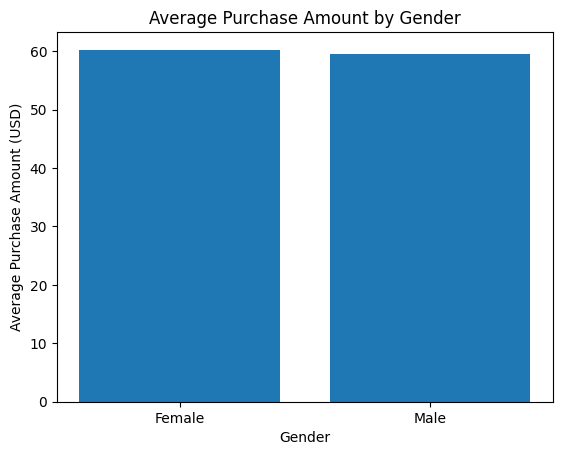

In [98]:
gender_purchase = shop.groupby('Gender')['Purchase Amount (USD)'].mean().reset_index()

# Creating a bar plot
fig, ax = plt.subplots()

# Plotting the bar chart
ax.bar(gender_purchase['Gender'], gender_purchase['Purchase Amount (USD)'])

# Adding labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Average Purchase Amount (USD)')
ax.set_title('Average Purchase Amount by Gender')

# Display the plot
plt.show()

## 4 What are the most commonly purchased items in each category?

In [101]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [102]:
shop.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

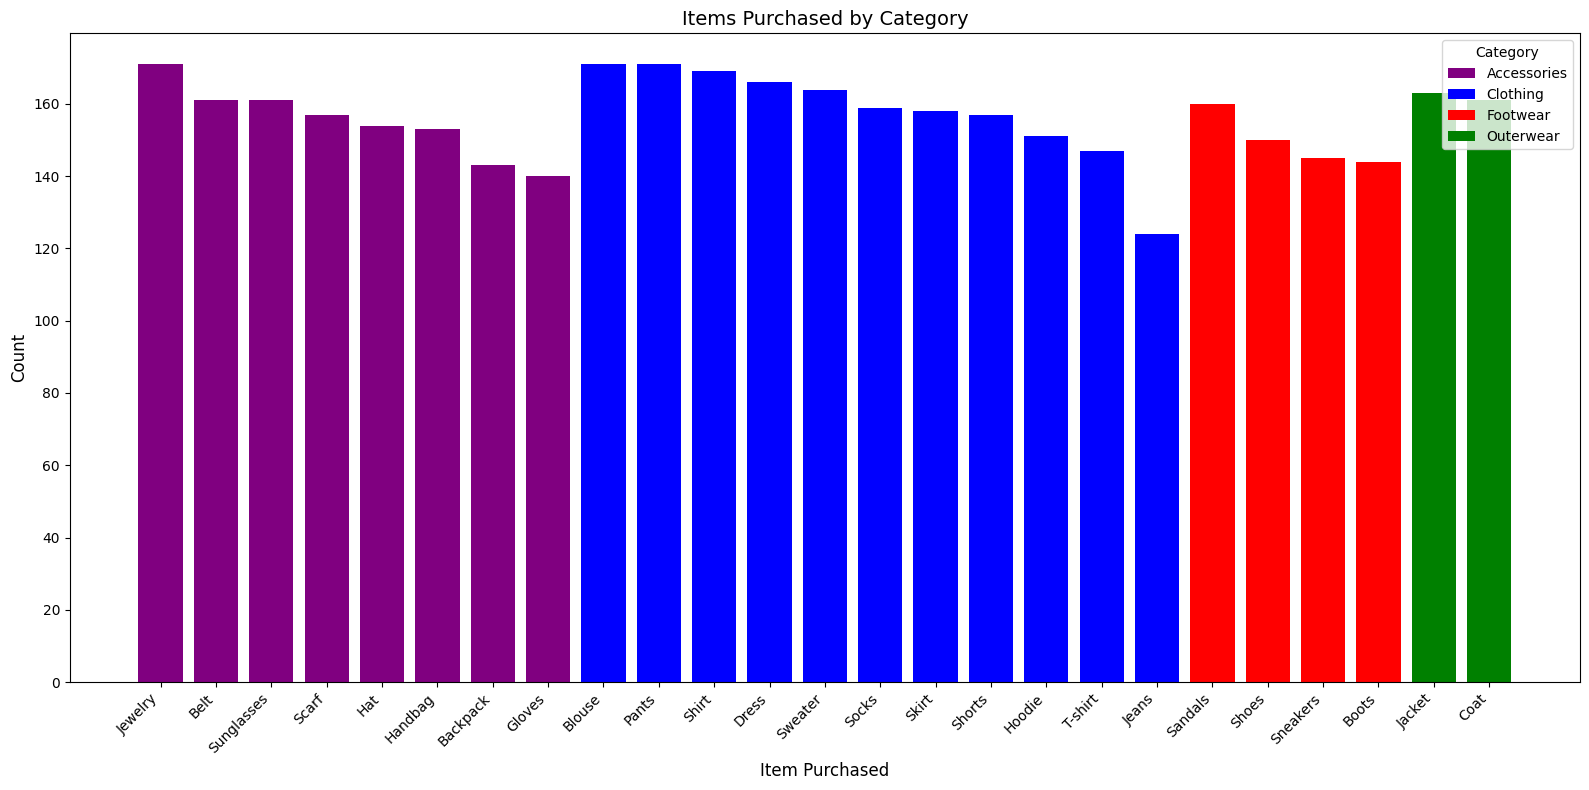

In [105]:
item_counts = shop.groupby('Category')['Item Purchased'].value_counts().reset_index(name='count')

# Get unique categories and colors for them
categories = item_counts['Category'].unique()
category_colors = {
    "Clothing": "blue",
    "Footwear": "red",
    "Outerwear": "green",
    "Accessories": "purple",
}

# Plot the bar chart
plt.figure(figsize=(16, 8))
for category in categories:
    category_data = item_counts[item_counts['Category'] == category]
    plt.bar(
        category_data['Item Purchased'], 
        category_data['count'], 
        color=category_colors[category], 
        label=category
    )

# Add labels, legend, and rotate x-axis labels
plt.xlabel("Item Purchased", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Items Purchased by Category", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title="Category", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


## 5 Are there any specific seasons or months where customer spending is significantly higher?

In [108]:
shop['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [109]:
shop[shop['Season'] == 'Summer'].value_counts().sum()

np.int64(955)

In [110]:
shop[shop['Season'] == 'Winter'].value_counts().sum()

np.int64(971)

In [111]:
shop[shop['Season'] == 'Spring'].value_counts().sum()

np.int64(999)

In [112]:
shop[shop['Season'] == 'Fall'].value_counts().sum()

np.int64(975)

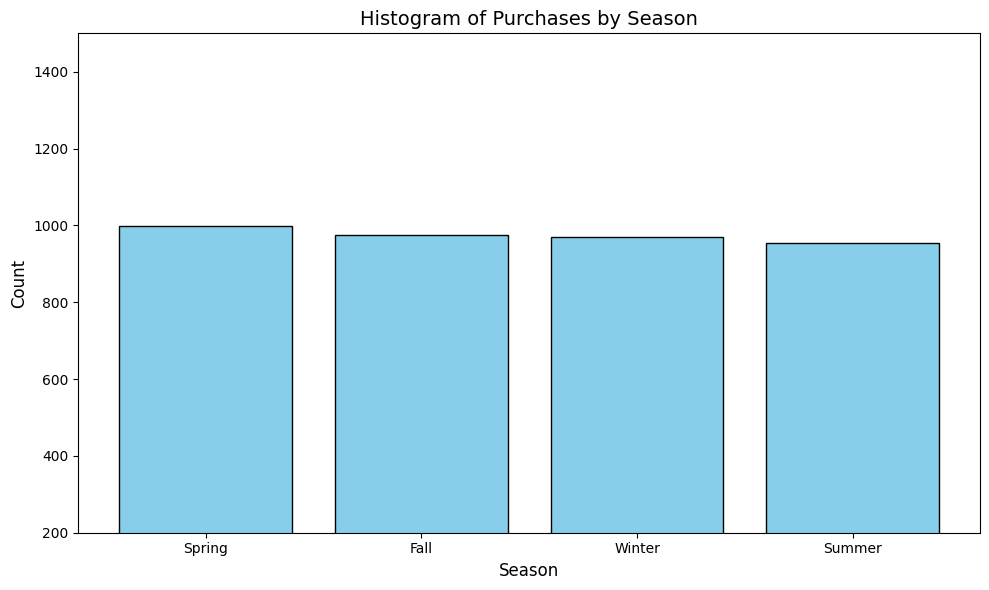

In [113]:
season_counts = shop['Season'].value_counts()

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(season_counts.index, season_counts.values, color='skyblue', edgecolor='black')

# Set the y-axis range
plt.ylim(200, 1500)

# Add labels and title
plt.xlabel("Season", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Histogram of Purchases by Season", fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()